In [144]:
import piplite
await piplite.install('seaborn')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [145]:
df = pd.read_csv('weight-height.csv')

In [146]:
lenG=df.Gender.unique()
len(lenG)

2

In [147]:
lenH=df.Height.unique()
len(lenH)

10000

In [148]:
lenW=df.Weight.unique()
len(lenW)

10000

In [149]:
df["Height"]*=2.54

In [150]:
df["Weight"]/=2.54

In [151]:
dfmale= df[df['Gender'] == 'Male']
  
print(dfmale)

     Gender      Height     Weight
0      Male  187.571423  95.233686
1      Male  174.706036  63.901761
2      Male  188.239668  83.756242
3      Male  182.196685  86.630894
4      Male  177.499761  81.240079
...     ...         ...        ...
4995   Male  174.904559  69.736635
4996   Male  175.192494  62.710720
4997   Male  170.215039  78.423386
4998   Male  181.756605  73.191303
4999   Male  178.693775  78.308272

[5000 rows x 3 columns]


In [152]:
dffemale = df[df['Gender'] == 'Female']
  
print(dffemale)

      Gender      Height     Weight
5000  Female  149.633259  40.192254
5001  Female  165.684232  55.632214
5002  Female  160.957270  51.591103
5003  Female  163.779193  50.461225
5004  Female  156.954464  51.095042
...      ...         ...        ...
9995  Female  168.078536  53.849391
9996  Female  170.350573  67.270829
9997  Female  162.224700  50.580834
9998  Female  175.346978  64.508843
9999  Female  157.338385  44.743741

[5000 rows x 3 columns]


In [153]:
def func(dfmale):
    return len(dfmale)
func(dfmale)

5000

In [154]:
def mean(n):
    sumVales = 0
    for i in n:
        sumVales+=i
    return sumVales / func(dfmale)
mean(dfmale['Height'])
        

175.32691860179213

In [155]:
def deviation(n):
    disspersion = 0
    mathmin=mean(n)
    print(mathmin)
    for i in n:
        disspersion+=(i - mathmin)**2
    return (disspersion/func(n))**0.5
diss(dfmale['Height'])
        

175.32691860179213


7.272212730423623

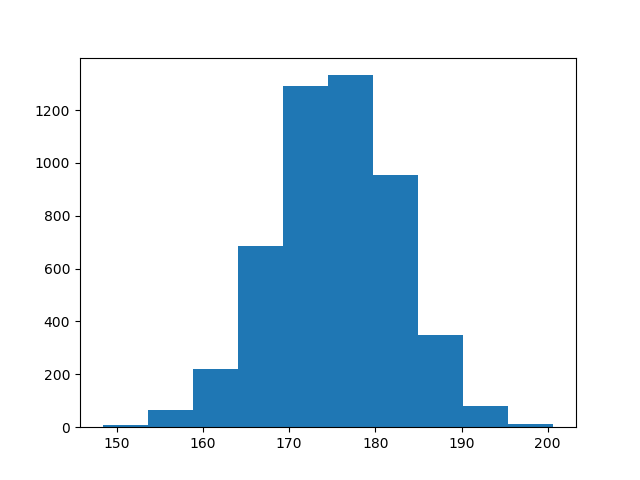

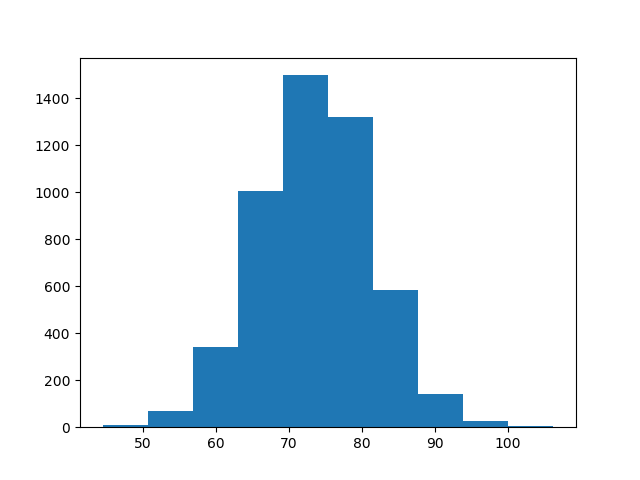

In [156]:
plt.hist(x=dfmale['Height'])
plt.show()
plt.hist(x=dfmale['Weight'])
plt.show()

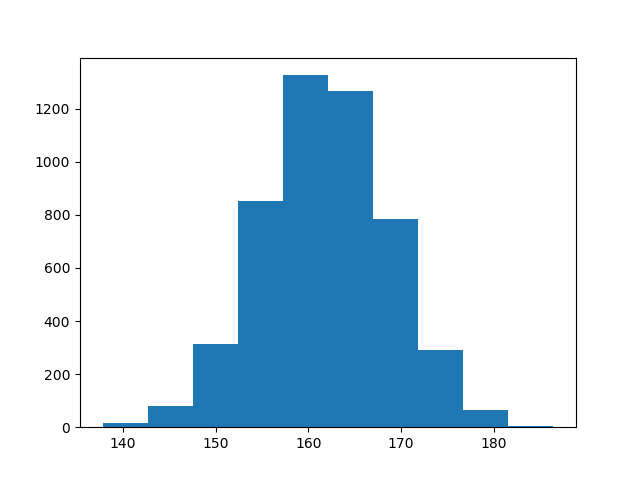

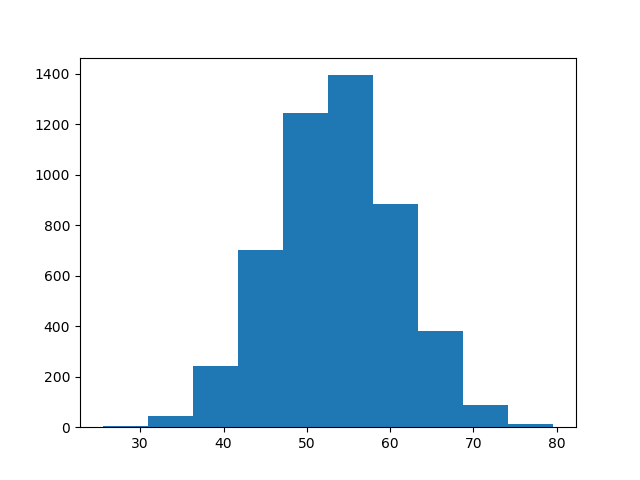

In [157]:
plt.hist(x=dffemale['Height'])
plt.show()
plt.hist(x=dffemale['Weight'])
plt.show()

Python bad mathematic  

In [158]:
dfmale.describe()

,Height,Weight
count,5000.000000,5000.000000
mean,175.326919,73.630166
std,7.272940,7.787856
min,148.353539,44.449976
25%,170.623685,68.459751
50%,175.330380,73.635254
75%,180.311409,78.881024
max,200.656806,106.295157


Python bad mathematic

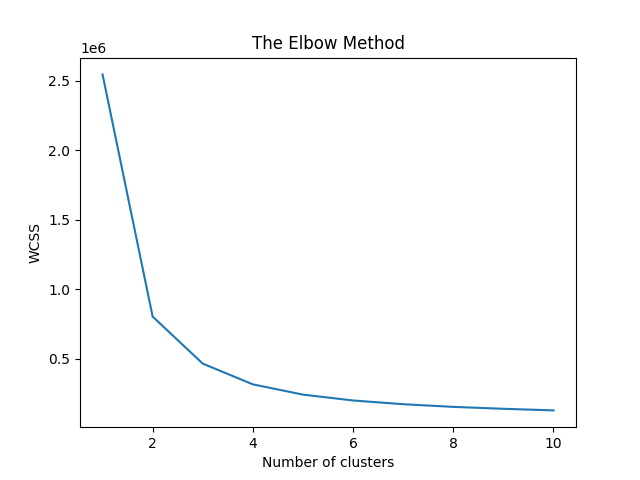

In [160]:
XOXO = df.iloc[:, [1, 2]].values
for i in range(len(XOXO)):
    if XOXO[i][1] < 30.0:
        XOXO[i] = 0
X = []
for i in range(len(XOXO)):
    if sum(XOXO[i]) == 0:
        pass
    elif sum(XOXO[i]) > 0:
        X.append([XOXO[i][0], XOXO[i][1]])
X = np.array(X, dtype=float)


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

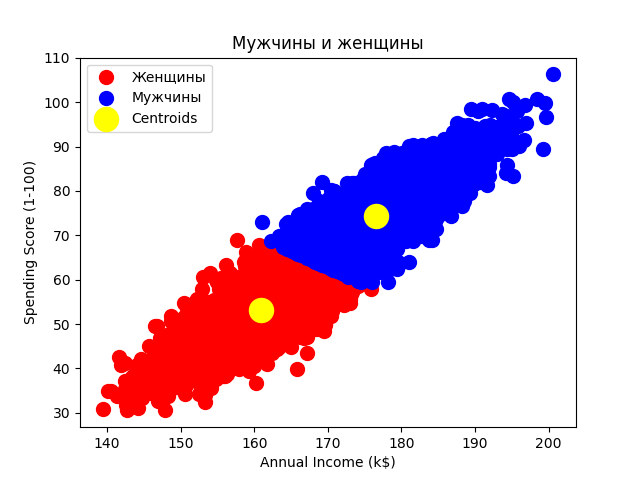

In [166]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Женщины')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Мужчины')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Мужчины и женщины')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [172]:
kmeans.predict([[170,63]])

array([0])

1 мужчина 0 женщина

In [182]:
from sklearn import metrics
metrics.rand_score(clusters, y_kmeans)

<class 'TypeError'>: len() of unsized object